# HR Analytics: Employee Job Promotion


## Business Problem Understanding

**Context**  
Sebuah perusahaan level multinasional yang memiliki jumlah pegawai dalam skala besar, ingin melebarkan usaha bisnisnya dengan membuka cabang di beberapa lokasi yang baru. Oleh karena itu, perusahaan yang melihat pegawainya sebagai aset (*talent*) ingin melakukan proses promosi kepada seluruh pegawainya yang nantinya akan menduduki jabatan satu tingkat di atas jabatan sebelumnya sesuai dengan departmennya masing-masing. Proses penentuan promosi jabatan akan diumumkan setelah pegawai melewati periode pelatihan dan evaluasi. Program pelatihan dan evaluasi ini bertujuan untuk pengembangan kemampuan pegawai. Dan apabila pegawai pada akhirnya dipromosikan, budaya perusahaan tetap terjaga di tempat yang baru.

Proses pemilihan kandidat pegawai yang akan dipromosi:
1. Perusahaan mengidentifikasi data pegawai berdasarkan rekomendasi dan kinerja.
2. Pegawai yang terpilih akan menjalani program pelatihan dan evaluasi secara terpisah untuk masing-masing departmennya. Program ini berlandaskan pada kemampuan yang dibutuhkan dari setiap departemen.
3. Di akhir program, berdasarkan berbagai faktor seperti kinerja pelatihan, dll., seorang pegawai akan menjadi kandidat untuk dipromosikan.


**Problem Statement :**

Proses promosi jabatan bisa menghabiskan waktu dan sumber daya jika perusahaan memeriksa semua pegawai tanpa melakukan penyaringan terlebih dahulu. Selain itu, proses pemilihan pegawai yang akan dipromosi akan berisiko subjektif apabila dilakukan oleh manusia karena faktor fatigue/lelah dan dapat menyebabkan kehilangan pegawai potensial apabila salah dalam menentukan pegawai yang akan dipromosi. Maka dari itu, perusahaan ingin lebih objektif dan dapat meningkatkan efisiensi dari proses promosi jabatan dengan mengetahui pegawai mana yang akan dipromosikan jabatannya.

Target :

0 : Tidak Promosi Jabatan

1 : Promosi Jabatan

**Goals :**

Maka berdasarkan permasalahan tersebut, perusahaan ingin memiliki kemampuan untuk memprediksi kemungkinan seorang pegawai yang akan dipromosikan pada perusahaan tersebut atau tidak, sehingga perusahaan dapat memfokuskan untuk mempersiapkan test assesment untuk kandidat pegawai yang direkomendasi oleh model dan proses promosi pegawai yang akan diumumkan pada tahap akhir. Limitasi model yang akan digunakan untuk memprediksi promosi pegawai (di bawah C-Level).
Dan juga, perusahaan ingin mengetahui faktor apa yang membuat seorang pegawai dipromosi atau tidak, sehingga perusahaan dapat membuat rencana/program yang lebih baik dalam mempromosikan pegawai potensial.

**Analytic Approach :**

Kami akan menggunakan pendekatan berbasis data (*data-driven*) untuk memprediksi apakah pegawai akan direkomendasi untuk promosi atau tidak. Prediksi kami berdasarkan pada informasi terkait demografi, pendidikan terakhir, kinerja, dan fitur lainnya yang ada pada pegawai.
 
Selanjutnya, kami akan melakukan analisis data untuk menemukan pola yang membedakan pegawai yang akan dipromosikan dan tidak dipromosikan jabatannya.

Kemudian, kami akan mengembangkan model klasifikasi yang akan membantu perusahaan untuk dapat memprediksi probabilitas seorang pegawai yang akan dipromosikan di perusahaan tersebut atau tidak.

**Business Questions :**
1. Apakah pegawai yang Lebih Tua mendapatkan lebih banyak Promosi daripada Karyawan yang Lebih Muda?
2. Apa Dampak Gender dalam Promosi jabatan?
3. Berapa Probabilitas Pegawai baru untuk Dipromosikan?
4. Berapa Rata-rata Skor Pelatihan pegawai yang mendapat Promosi?
5. Bagaimana distribusi masa kerja terhadap kenaikan jabatan?
6. Department mana yg paling banyak dipromosi?
7. Bagaimana hubungan antar umur pekerja dan tempat bekerja terhadap promosi?
8. Bagaimana cara perusahaan untuk dapat mengefisiensikan waktu untuk mempromosikan jabatan? 

**Metric Evaluation**

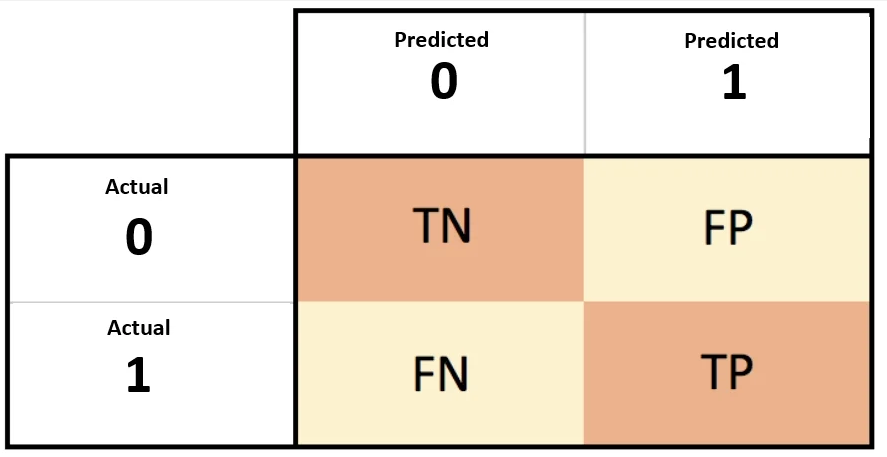

Type 1 error : False Positive  
Konsekuensi: Terbuangnya waktu, biaya, dan tenaga. berpotensi untuk menduduki jabatan yang tidak sesuai dengan kemampuannya.

Type 2 error : False Negative  
Konsekuensi: Kehilangan kandidat pegawai potensial. Dapat menurunkan motivasi bekerja dan penurunan produktivitas kerja. 

Berdasarkan konsekuensinya, maka sebisa mungkin yang akan kita lakukan adalah membuat model yang efisien yang dapat mengurangi waktu dan tenaga. Namun juga membuat model tanpa membuat hilangnya pegawai potensial yang akan memegang tanggung jawab lebih besar dari sebelumnya. Maka dari itu, nilai recall dan precision berdasarkan kelas positivenya perlu untuk diseimbangkan. Sehingga metric utama yang akan digunakan adalah `f1-score`.

In [1]:
## importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, ShuffleSplit, RandomizedSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report, plot_confusion_matrix, roc_auc_score
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.compose import ColumnTransformer
import category_encoders as ce

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [2]:
df = pd.read_csv("hr_train.csv")
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won?           54808 non-null  int64  
 11  avg_training_score    54808 non-null  int64  
 12  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 5.4+ MB


### Data Cleaning

Semua data akan dipersiapkan untuk dianalisa dan digunakan dalam pemodelan machine learning. Terdapat beberapa data kosong pada beberapa fitur yang nantinya akan diperbaiki, dan juga penghapusan kolom employee_id karena tidak berguna dalam analisa dan machine learning.

In [4]:
# General data info
listItem = []
for col in df.columns :
    listItem.append([col,
                     df[col].dtype,
                     len(df),
                     df[col].isna().sum(),
                     round((df[col].isna().sum()/len(df[col])) * 100,2),
                     df[col].nunique(), 
                     df[col].unique()])

dfDesc = pd.DataFrame(columns=['Column Name', 
                               'Data Type', 
                               'Data Count', 
                               'Missing Value', 
                               'Missing Value Percentage', 
                               'Number of Unique', 
                               'Unique'],
                     data=listItem)
dfDesc

,Column Name,Data Type,Data Count,Missing Value,Missing Value Percentage,Number of Unique,Unique
0,employee_id,int64,54808,0,0.00,54808,"[65438, 65141, 7513, 2542, 48945, 58896, 20379..."
1,department,object,54808,0,0.00,9,"[Sales & Marketing, Operations, Technology, An..."
2,region,object,54808,0,0.00,34,"[region_7, region_22, region_19, region_23, re..."
3,education,object,54808,2409,4.40,3,"[Master's & above, Bachelor's, nan, Below Seco..."
4,gender,object,54808,0,0.00,2,"[f, m]"
5,recruitment_channel,object,54808,0,0.00,3,"[sourcing, other, referred]"
6,no_of_trainings,int64,54808,0,0.00,10,"[1, 2, 3, 4, 7, 5, 6, 8, 10, 9]"
7,age,int64,54808,0,0.00,41,"[35, 30, 34, 39, 45, 31, 33, 28, 32, 49, 37, 3..."
8,previous_year_rating,float64,54808,4124,7.52,5,"[5.0, 3.0, 1.0, 4.0, nan, 2.0]"
9,length_of_service,int64,54808,0,0.00,35,"[8, 4, 7, 10, 2, 5, 6, 1, 3, 16, 9, 11, 26, 12..."


Pertama kita akan menghapus kolom `employee_id`, karena kolom ini berisi id unik yg menjadikan pembeda identitas setiap pegawai dan tidak berguna untuk analisa yang akan dilakukan dan juga tidak berguna dalam pembuatan model machine learning nantinya.

Melalui nilai unik yang terdapat pada kolom `employee_id` kita dapat melihat bahwasanya tidak terdapat data duplikat, karena total seluruh data (data count) sama dengan jumlah unik data (number of unique) pada `employee_id`.

In [5]:
## drop employee_id
df.drop(columns='employee_id', inplace = True)

In [6]:
df.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'awards_won?', 'avg_training_score', 'is_promoted'],
      dtype='object')

kolom `employee_id` sudah terhapus. Selanjutnya kita akan menghandle kolom yang memiliki missing value. Pertama akan kita check melalui heatmap di bawah

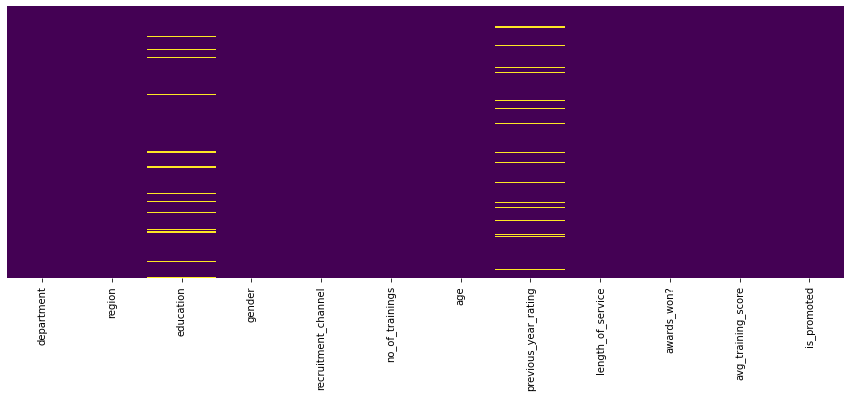

In [7]:
# Checking Missing Value
plt.figure(figsize = (15, 5))
sns.heatmap(df.isna(), cmap = 'viridis',yticklabels = False, cbar= False)
plt.show()

Dari heatmap di atas dapat kita lihat terdapat missing value pada kolom `education` dan `previous_year_rating`. Selanjutnya akan kita periksa apakah nilai missing valuenya signifikan.

In [8]:
round(df.isna().sum()*100/len(df), 2)

department              0.00
region                  0.00
education               4.40
gender                  0.00
recruitment_channel     0.00
no_of_trainings         0.00
age                     0.00
previous_year_rating    7.52
length_of_service       0.00
awards_won?             0.00
avg_training_score      0.00
is_promoted             0.00
dtype: float64

Dapat dilihat missing value yang terdapat pada dataFrame tidak signifikan, untuk kolom `education` sebesar 4.40% dan `previous_year_rating` sebesar 7.52%.

Selanjutnya kita akan cek apakah nilai kosong pada kolom `previous_year_rating` merupakan pegawai baru yang pertama kali mengikuti program training untuk promosi jabatan, dengan melihat berapa lama pegawai sudah bekerja pada kolom `length_of_services`.

In [9]:
df.loc[df['previous_year_rating'].isna()]['length_of_service'].unique()

array([1], dtype=int64)

Setelah dilakukan pengecekan terhadap pegawai yang tidak memiliki nilai pada `previous_year_rating`, hanya terdapat satu jenis unique value pada kolom `length_of_service` yaitu 1 tahun. sehingga asumsi di awal yaitu pegawai baru yang baru pertama kali mengikuti program training untuk promosi dapat diterima. Selanjutnya nilai kosong pada kolom ini akan diisi dengan nilai 0.

Kemudian untuk nilai kosong pada `education` akan diubah menjadi value `missing` dengan asumsi, nilai ini merupakan data yang tidak diisi sebelumnya oleh pegawai.

In [10]:
## fillna missing value
data_missing = {
    'previous_year_rating' : 0,
    'education' : 'missing'
}
df.fillna(data_missing, inplace = True)

In [11]:
# General data info
listItem = []
for col in df.columns :
    listItem.append([col,
                     df[col].dtype,
                     len(df),
                     df[col].isna().sum(),
                     round((df[col].isna().sum()/len(df[col])) * 100,2),
                     df[col].nunique(), 
                     df[col].unique()])

dfDesc = pd.DataFrame(columns=['Column Name', 
                               'Data Type', 
                               'Data Count', 
                               'Missing Value', 
                               'Missing Value Percentage', 
                               'Number of Unique', 
                               'Unique'],
                     data=listItem)
dfDesc

,Column Name,Data Type,Data Count,Missing Value,Missing Value Percentage,Number of Unique,Unique
0,department,object,54808,0,0.0,9,"[Sales & Marketing, Operations, Technology, An..."
1,region,object,54808,0,0.0,34,"[region_7, region_22, region_19, region_23, re..."
2,education,object,54808,0,0.0,4,"[Master's & above, Bachelor's, missing, Below ..."
3,gender,object,54808,0,0.0,2,"[f, m]"
4,recruitment_channel,object,54808,0,0.0,3,"[sourcing, other, referred]"
5,no_of_trainings,int64,54808,0,0.0,10,"[1, 2, 3, 4, 7, 5, 6, 8, 10, 9]"
6,age,int64,54808,0,0.0,41,"[35, 30, 34, 39, 45, 31, 33, 28, 32, 49, 37, 3..."
7,previous_year_rating,float64,54808,0,0.0,6,"[5.0, 3.0, 1.0, 4.0, 0.0, 2.0]"
8,length_of_service,int64,54808,0,0.0,35,"[8, 4, 7, 10, 2, 5, 6, 1, 3, 16, 9, 11, 26, 12..."
9,awards_won?,int64,54808,0,0.0,2,"[0, 1]"


Dapat dilihat sekarang data yang kita miliki sudah bersih, selanjutnya akan masuk ke tahap analisa.

In [96]:
## Data Correlation

### Data Preparation

Seluruh data pada fitur/kolom kategorikal akan diubah dengan menggunakan one-hot encoding. Sekali pun terdapat fitur `education` yang merupakan tipe data kategorik ordinal, kami akan tetap menggunakan one-hot encoding karena terdapat value 'missing' sebagai ganti missing value sebelumnya.

### Feature Selection


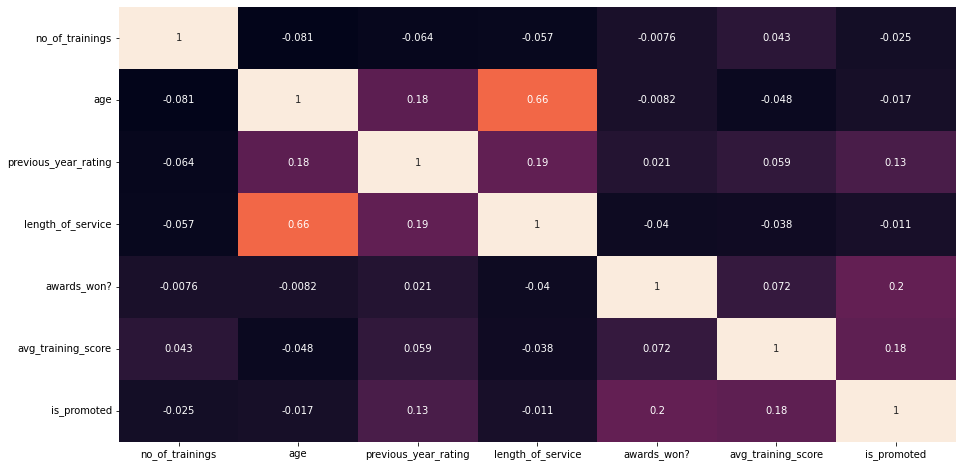

In [97]:
plt.figure(figsize=(15, 8))
sns.heatmap(df.corr(), annot = True, cbar = False)
plt.show()

In [98]:
import dython
from dython.nominal import associations, cramers_v, theils_u, correlation_ratio

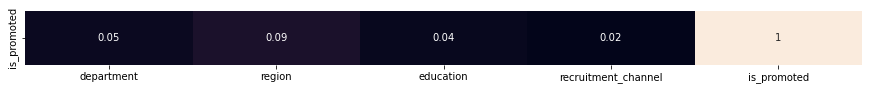

In [102]:
assoc_cr = []
col = ['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'awards_won?', 'avg_training_score']
for i in df.drop(columns = col).columns:
    assoc = round(cramers_v(df['is_promoted'], df[i]), 2)
    assoc_cr.append(assoc)

df_cr = pd.DataFrame(data = [assoc_cr], columns = df.drop(columns = col).columns, index = ['is_promoted'])

plt.figure(figsize = (15,1))
sns.heatmap(df_cr, annot = True, cbar = False)
plt.show()

In [14]:
df.drop(columns = 'gender', inplace = True)

In [15]:
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['department', 'region', 'education', 'recruitment_channel'])
], remainder='passthrough')

In [16]:
X = df.drop(columns=['is_promoted'])
y = df['is_promoted']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    stratify = y,
                                                    test_size = 0.2,
                                                    random_state = 1601)

In [18]:
logreg = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
xgb = XGBClassifier()

### Model Benchmarking : K-Fold

In [19]:
models = [logreg,knn,dt,rf,xgb]
score=[]
rata=[]
std=[]

for i in models:
    skfold=StratifiedKFold(n_splits=5)
    estimator=Pipeline([
        ('preprocess',transformer),
        ('model',i)])
    model_cv=cross_val_score(estimator,X_train,y_train,cv=skfold,scoring='f1')
    score.append(model_cv)
    rata.append(model_cv.mean())
    std.append(model_cv.std())
    
pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost'],'mean f1':rata,'sdev':std}).set_index('model').sort_values(by='mean f1',ascending=False)

,mean f1,sdev
model,,
XGBoost,0.506709,0.012657
Random Forest,0.436135,0.016667
Decision Tree,0.383593,0.003823
KNN,0.220798,0.021138
Logistic Regression,0.192304,0.024706


In [ ]:
models = [logreg,knn,dt,rf,xgb]
score_f1 = []

def y_pred_func(i):
    estimator=Pipeline([
        ('preprocess',transformer),
        ('model',i)])
    X_train,X_test
    
    estimator.fit(X_train,y_train)
    return(estimator,estimator.predict(X_test),X_test)

for i,j in zip(models, ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost']):
    estimator,y_pred,X_test = y_pred_func(i)
    y_pred = estimator.predict(X_test)
    # score_f1.append(f1_score(y_test,y_pred))
    print(j,'\n', classification_report(y_test,y_pred))

Logistic Regression 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     10028
           1       0.72      0.12      0.21       934

    accuracy                           0.92     10962
   macro avg       0.82      0.56      0.58     10962
weighted avg       0.91      0.92      0.89     10962

KNN 
               precision    recall  f1-score   support

           0       0.93      0.99      0.96     10028
           1       0.68      0.14      0.23       934

    accuracy                           0.92     10962
   macro avg       0.80      0.57      0.59     10962
weighted avg       0.90      0.92      0.90     10962

Decision Tree 
               precision    recall  f1-score   support

           0       0.94      0.93      0.94     10028
           1       0.37      0.41      0.39       934

    accuracy                           0.89     10962
   macro avg       0.66      0.67      0.66     10962
weighted avg       0.90      0

### Test Oversampling with K-Fold Cross Validation

In [ ]:
def calc_train_error(X_train, y_train, model):
#     '''returns in-sample error for already fit model.'''
    predictions = model.predict(X_train)
    predictProba = model.predict_proba(X_train)
    accuracy = accuracy_score(y_train, predictions)
    f1 = f1_score(y_train, predictions, average='macro')
    roc_auc = roc_auc_score(y_train, predictProba[:,1])
    recall = recall_score(y_train, predictions)
    precision = precision_score(y_train, predictions)
    report = classification_report(y_train, predictions)
    return { 
        'report': report, 
        'f1' : f1, 
        'roc': roc_auc, 
        'accuracy': accuracy,
        'recall': recall,
        'precision': precision
    }
    
def calc_validation_error(X_test, y_test, model):
#     '''returns out-of-sample error for already fit model.'''
    predictions = model.predict(X_test)
    predictProba = model.predict_proba(X_test)
    accuracy = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions, average='macro')
    roc_auc = roc_auc_score(y_test, predictProba[:,1])
    recall = recall_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    report = classification_report(y_test, predictions)
    return { 
        'report': report, 
        'f1' : f1, 
        'roc': roc_auc, 
        'accuracy': accuracy,
        'recall': recall,
        'precision': precision
    }
    
def calc_metrics(X_train, y_train, X_test, y_test, model):
#     '''fits model and returns the in-sample error and out-of-sample error'''
    model.fit(X_train, y_train)
    train_error = calc_train_error(X_train, y_train, model)
    validation_error = calc_validation_error(X_test, y_test, model)
    return train_error, validation_error

In [ ]:
K = 10
kf = StratifiedKFold(n_splits=K, shuffle=True, random_state=42)
data = X_train
target = y_train

In [ ]:
train_errors_without_oversampling = []
validation_errors_without_oversampling = []

train_errors_with_oversampling = []
validation_errors_with_oversampling = []

for train_index, val_index in kf.split(data, target):
    
    # split data
    X_train_1, X_val = data.iloc[train_index], data.iloc[val_index]
    y_train_1, y_val = target.iloc[train_index], target.iloc[val_index]
    
#     print(len(X_val), (len(X_train) + len(X_val)))
    ros = RandomOverSampler()

    X_ros, y_ros = ros.fit_resample(X_train_1, y_train_1)

    # instantiate model
    estimator=Pipeline([
        ('preprocess',transformer),
        ('model',xgb)
    ])

    #calculate errors
    train_error_without_oversampling, val_error_without_oversampling = calc_metrics(X_train_1, y_train_1, X_val, y_val, estimator)
    train_error_with_oversampling, val_error_with_oversampling = calc_metrics(X_ros, y_ros, X_val, y_val, estimator)
    
    # append to appropriate list
    train_errors_without_oversampling.append(train_error_without_oversampling)
    validation_errors_without_oversampling.append(val_error_without_oversampling)
    
    train_errors_with_oversampling.append(train_error_with_oversampling)
    validation_errors_with_oversampling.append(val_error_with_oversampling)

#### Evaluation Metrics Without Oversampling

In [ ]:
listItem = []

for tr,val in zip(train_errors_without_oversampling,validation_errors_without_oversampling) :
    listItem.append([tr['accuracy'],val['accuracy'],tr['roc'],val['roc'],tr['f1'],val['f1'],
                     tr['recall'],val['recall'],tr['precision'],val['precision']])

listItem.append(list(np.mean(listItem,axis=0)))
    
dfEvaluate = pd.DataFrame(listItem, 
                    columns=['Train Accuracy', 
                            'Test Accuracy', 
                            'Train ROC AUC', 
                            'Test ROC AUC', 
                            'Train F1 Score',
                            'Test F1 Score',
                            'Train Recall',
                            'Test Recall',
                            'Train Precision',
                            'Test Precision'])

listIndex = list(dfEvaluate.index)
listIndex[-1] = 'Average'
dfEvaluate.index = listIndex
dfEvaluate

,Train Accuracy,Test Accuracy,Train ROC AUC,Test ROC AUC,Train F1 Score,Test F1 Score,Train Recall,Test Recall,Train Precision,Test Precision
0,0.947011,0.944356,0.921051,0.820605,0.762758,0.755867,0.385897,0.386059,0.979607,0.905660
1,0.947011,0.942759,0.918858,0.836938,0.763042,0.742047,0.386790,0.356568,0.977444,0.923611
2,0.946834,0.946180,0.922499,0.820927,0.761725,0.765520,0.384226,0.401070,0.978030,0.925926
3,0.947087,0.942759,0.920551,0.810676,0.763429,0.743903,0.387500,0.360963,0.977477,0.918367
4,0.947087,0.941163,0.921963,0.813010,0.763429,0.735333,0.387500,0.347594,0.977477,0.902778
5,0.947163,0.940251,0.921933,0.809498,0.763438,0.724231,0.386905,0.323529,0.981132,0.930769
6,0.947392,0.942290,0.923316,0.810928,0.764789,0.739988,0.389170,0.353887,0.982720,0.916667
7,0.946404,0.942746,0.919603,0.820796,0.759361,0.740158,0.380244,0.351206,0.975573,0.935714
8,0.946987,0.943887,0.919567,0.824959,0.762502,0.746722,0.385302,0.361930,0.980318,0.944056
9,0.947671,0.937272,0.922259,0.792770,0.766362,0.707821,0.391848,0.300268,0.984305,0.888889


#### Evaluation Metrics With Oversampling

In [ ]:
listItem = []

for tr,val in zip(train_errors_with_oversampling,validation_errors_with_oversampling) :
    listItem.append([tr['accuracy'],val['accuracy'],tr['roc'],val['roc'],tr['f1'],val['f1'],
                     tr['recall'],val['recall'],tr['precision'],val['precision']])

listItem.append(list(np.mean(listItem,axis=0)))
    
dfEvaluate = pd.DataFrame(listItem, 
                    columns=['Train Accuracy', 
                            'Test Accuracy', 
                            'Train ROC AUC', 
                            'Test ROC AUC', 
                            'Train F1 Score',
                            'Test F1 Score',
                            'Train Recall',
                            'Test Recall',
                            'Train Precision',
                            'Test Precision'])

listIndex = list(dfEvaluate.index)
listIndex[-1] = 'Average'
dfEvaluate.index = listIndex
dfEvaluate

,Train Accuracy,Test Accuracy,Train ROC AUC,Test ROC AUC,Train F1 Score,Test F1 Score,Train Recall,Test Recall,Train Precision,Test Precision
0,0.846551,0.837856,0.938279,0.817024,0.846467,0.649631,0.823130,0.616622,0.863582,0.288221
1,0.858961,0.842645,0.944061,0.829093,0.858916,0.656246,0.841108,0.624665,0.872253,0.297573
2,0.858771,0.839225,0.943035,0.819443,0.858745,0.652588,0.845129,0.622995,0.868835,0.292346
3,0.856251,0.838540,0.943742,0.804921,0.856203,0.640391,0.838093,0.564171,0.869675,0.279101
4,0.854492,0.832839,0.941474,0.800766,0.854440,0.642398,0.835656,0.604278,0.868369,0.278668
5,0.851763,0.845154,0.940025,0.809263,0.851678,0.650630,0.827872,0.580214,0.869415,0.293640
6,0.851237,0.836907,0.940395,0.796135,0.851160,0.637642,0.828509,0.560322,0.867963,0.275000
7,0.852359,0.828239,0.941451,0.813495,0.852282,0.636246,0.829645,0.597855,0.869127,0.269976
8,0.851223,0.830064,0.941171,0.821045,0.851149,0.640111,0.828897,0.608579,0.867639,0.274818
9,0.859422,0.824361,0.944945,0.800501,0.859394,0.630879,0.845323,0.589812,0.869851,0.262843


Dari hasil evaluation metrics, hasil recall(+) setelah dilakukan oversampling akan akan lebih baik daripada sebelum dilakukan oversampling, namun hasil precision(+) lebih rendah daripada sebelum dilakukan oversampling. Hal ini dikarenakan adanya tradeoff dalam kenaikan recall dan penurunan precision dikarenakan, jumlah data dari kelas minoritas sama dengan kelas mayoritasnya. 

Dengan kata lain, model ketika di oversampling, mampu menebak pegawai potensial yang akan dipromosi lebih banyak daripada sebelumnya. Namun akan menurunkan kemampuan ketepatan model dalam menebak pegawai yang akan dipromosi. Hal ini akan menyebabkan waktu, tenaga, dan biaya akan lebih tinggi daripada model ketika tidak di oversampling. 

In [ ]:
for rep in validation_errors_without_oversampling :
    print(rep['report'])

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      4012
           1       0.91      0.39      0.54       373

    accuracy                           0.94      4385
   macro avg       0.93      0.69      0.76      4385
weighted avg       0.94      0.94      0.93      4385

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      4012
           1       0.92      0.36      0.51       373

    accuracy                           0.94      4385
   macro avg       0.93      0.68      0.74      4385
weighted avg       0.94      0.94      0.93      4385

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      4011
           1       0.93      0.40      0.56       374

    accuracy                           0.95      4385
   macro avg       0.94      0.70      0.77      4385
weighted avg       0.95      0.95      0.94      4385

              preci

In [ ]:
for rep in validation_errors_with_oversampling :
    print(rep['report'])

              precision    recall  f1-score   support

           0       0.96      0.86      0.91      4012
           1       0.29      0.62      0.39       373

    accuracy                           0.84      4385
   macro avg       0.62      0.74      0.65      4385
weighted avg       0.90      0.84      0.86      4385

              precision    recall  f1-score   support

           0       0.96      0.86      0.91      4012
           1       0.30      0.62      0.40       373

    accuracy                           0.84      4385
   macro avg       0.63      0.74      0.66      4385
weighted avg       0.90      0.84      0.87      4385

              precision    recall  f1-score   support

           0       0.96      0.86      0.91      4011
           1       0.29      0.62      0.40       374

    accuracy                           0.84      4385
   macro avg       0.63      0.74      0.65      4385
weighted avg       0.90      0.84      0.86      4385

              preci

Dari hasil classification reports di atas, dengan tujuan utama dari permasalahan kita adalah untuk efisiensi waktu, tenaga, dan biaya serta tidak menyia-nyiakan pegawai yang potensial. Dimana nilai f1 score lebih tinggi pada saat model tidak di oversampling. Maka dari itu, selanjutnya kita akan menggunakan model sebelum di oversampling. Selanjutnya akan dilakukan hyperparameter tuning untuk model XGBoost.

#### Hyperparameter Tuning

In [82]:
pipe_XGB = Pipeline([
    ('prep', transformer),
    ('algo', XGBClassifier())
])

param_XGB = {
    "algo__n_estimators" : np.arange(50, 601, 50),
    "algo__max_depth" : np.arange(1, 10),
    "algo__learning_rate" : np.logspace(-3, 0, 4),
    "algo__gamma" : np.logspace(-3, 0, 6),
    "algo__colsample_bytree" : [0.3, 0.5, 0.7, 0.8],
    "algo__subsample" : [0.3, 0.5, 0.7, 0.8],
    "algo__reg_alpha" : np.logspace(-3, 3, 7),
    "algo__reg_lambda" : np.logspace(-3, 3, 7)
}

skf = StratifiedKFold(n_splits=10)

In [83]:
GS_XGB = GridSearchCV(pipe_XGB, param_XGB, cv = skf, scoring='f1', verbose = 3, n_jobs=-1)

In [84]:
RS_XGB = RandomizedSearchCV(pipe_XGB, param_XGB,cv = skf, scoring='f1', verbose = 3, n_jobs=-1 )

In [85]:
RS_XGB.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('prep',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('onehot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['department',
                                                                                'region',
                                                                                'education',
                                                                                'recruitment_channel'])])),
                                             ('algo',
                                              XGBClassifier(base_score=None,
                                                          

In [86]:
RS_XGB.best_params_

{'algo__subsample': 0.8,
 'algo__reg_lambda': 100.0,
 'algo__reg_alpha': 0.1,
 'algo__n_estimators': 250,
 'algo__max_depth': 9,
 'algo__learning_rate': 1.0,
 'algo__gamma': 0.015848931924611134,
 'algo__colsample_bytree': 0.5}

In [87]:
XGB_Tuned = RS_XGB.best_estimator_

In [88]:
print(classification_report(y_test, XGB_Tuned.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97     10028
           1       0.81      0.35      0.49       934

    accuracy                           0.94     10962
   macro avg       0.88      0.67      0.73     10962
weighted avg       0.93      0.94      0.93     10962



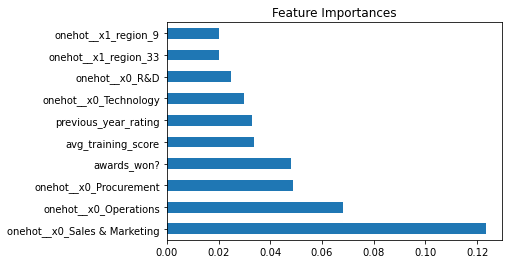

In [95]:
coef1 = pd.Series(XGB_Tuned['algo'].feature_importances_, transformer.get_feature_names()).sort_values(ascending = False).head(10)
coef1.plot(kind='barh', title='Feature Importances')
plt.show()

Terlihat bahwa ternyata untuk model XGB ini, fitur/kolom Department Sales & Marketing adalah yang paling penting, kemudian diikuti dengan Department Operations, Department Procurement, awards_won?, dan sebagainya.

Secara garis besar, model kita melihat kolom department merupakan fitur yang sangat penting dibandingkan fitur lainnya, bahkan fitur/kolom avg_training_score berada pada urutan ke 5. Ini dapat menunjukkan bahwa hasil training belum sepenuhnya menentukan pegawai akan dipromosi. Nantinya, kita dapat lebih fokus menentukan kenaikan jabatan untuk pegawai di masing - masing department. Sehingga setiap pegawai di masing-masing department memiliki kesempatan yang sama dalam proses kenaikan jabatan.

## Kesimpulan:

Dengan menggunakan model Machine Learning kita dapat melakukan penghematan waktu dengan menyaring terlebih dahulu pegawai yang akan direkomendasikan untuk dipromosi. hal ini dapat dilihat dari classification report dengan nilai precision sebesar 0.81 pada class positive. yang berarti model memiliki ketepatan sebesar 81% dalam menyaring pegawai yang sebenarnya akan dipromosi. Dengan nilai recall sebesar 0.99 pada kelas negative, artinya model dapat dapat memprediksi hingga 99% untuk pegawai yang tidak akan dipromosi dari keseluruhan pegawai yang tebakannnya benar, dengan ketepatan (precision) prediksinya sebesar 0.94. Ini berarti model dapat menebak pegawai mana yang tidak untuk dipromosikan dengan ketepatan mencapai 94%. Artinya dari 100 pegawai yang tidak dipromosikan, model dapat menebak 94 pegawai. Dengan nilai recall pada kelas positive yang hanya sebesar 0.35. Model hanya dapat menebak sebesar 35% dari keseluruhan pegawai yang benar tebakannya. Ini mengakibatkan konsekuensi semakin sedikitnya pegawai potensial yang akan direkomendasikan.


Tanpa menggunakan model, dengan asumsi pengecekan dokumen seorang pegawai berkisar 5 menit.
Maka apabila terdapat 1000 pegawai yang akan diperiksa secara keseluruhan dengan cara manual, dibutuhkan waktu selama 5000 menit.
Sedangkan dengan menggunakan model, kita dapat menyaring dari 1000 pegawai. 
Kita akan mendapatkan, ketepatan rata-rata hingga 88% (macro avg precision) dalam menyaring pegawai. Artinya model dapat menghemat waktu hingga 88% (4400 menit) dari total keseluruhan. Dengan menggunakan model, setidaknya model dapat mengklasifikasikan hingga 35% (recall positive) pegawai akan rekomendasikan untuk promosi dari total pegawai yang telah diprediksi secara benar.

In [104]:
import pickle
pickle.dump(XGB_Tuned, open("modelPromotion.pkl", "wb"))